In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import json
import seaborn as sns
from random import randint
from main_data import (
    key_to_camelot,
    open_wheel,
    add_features,
    get_playlist,
    get_friendly,
    pickl,
    unpickl,
    sp,
)


In [ ]:
# %store -r streams_df streams_af_df no_skip_df playlist_af_df
# streams_df, streams_af_df, no_skip_df, playlist_af_df = streams_df, streams_af_df, no_skip_df, playlist_af_df


In [4]:
# Import DataFrames generated by main_data.py
def import_all():
    (
        all_streams_df,
        streams_df,
        streams_af_df,
        no_skip_df,
        playlist_af_df,
        pod_df,
        wheel_df,
    ) = unpickl(
        "all_streams_df.p",
        "streams_df.p",
        "streams_af_df.p",
        "no_skip_df.p",
        "playlist_af_df.p",
        "podcasts_df.p",
        "wheel_df.p",
    )


In [14]:
# Import DataFrames generated by main_data.py
def import_all():
    return unpickl(
        "all_streams_df.p",
        "streams_df.p",
        "streams_af_df.p",
        "no_skip_df.p",
        "playlist_af_df.p",
        "podcasts_df.p",
        "wheel_df.p",
    )


In [12]:
(
    all_streams_df,
    streams_df,
    streams_af_df,
    no_skip_df,
    playlist_af_df,
    pod_df,
    wheel_df,
) = import_all()


In [13]:
all_streams_df


,timestamp,playtime,track,artist,album,id,episode,show,spotify_episode_uri,start,end,shuffle,ddate,dtime,date,time,month,year,day
0,2021-03-25 18:43:26+00:00,351,Throw Some D's Remix,Rich Boy,Rich Boy,1qXLj4ywjsA0hGmaibmnn3,None,None,None,trackdone,trackdone,False,2021-03-25,18:43:26,03/25/2021,18:43:26,Mar,2021,Thu
1,2022-01-18 16:50:55+00:00,3141,None,None,None,None,178 – Joy of Cooking (Pies),Sleepy,spotify:episode:6Y7GtYpMqhGMkjp84Tbb2o,trackdone,trackdone,False,2022-01-18,16:50:55,01/18/2022,16:50:55,Jan,2022,Tue
2,2019-12-05 05:13:00+00:00,158,Bounce,Latto,Big Latto,45anQ4WSf2a9QhZq55aaMw,None,None,None,trackdone,trackdone,False,2019-12-05,05:13:00,12/05/2019,05:13:00,Dec,2019,Thu
3,2019-12-07 08:21:03+00:00,263,"Can't Stop, Won't Stop",Young Gunz,Tough Luv,1kgDlypHy9hCvCxeoCtd7X,None,None,None,trackdone,trackdone,False,2019-12-07,08:21:03,12/07/2019,08:21:03,Dec,2019,Sat
4,2021-09-17 03:23:34+00:00,44,Douha (Mali Mali),Disclosure,ENERGY,33J9lmeViWXN0Le0vWRyjc,None,None,None,playbtn,endplay,False,2021-09-17,03:23:34,09/17/2021,03:23:34,Sep,2021,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89268,2022-01-27 00:42:30+00:00,23,Nonstop Feeling,Mall Grab,Steel City Dance Discs Volume 20,2oQVKWHh7FpdPtQkqt3kMc,None,None,None,clickrow,endplay,False,2022-01-27,00:42:30,01/27/2022,00:42:30,Jan,2022,Thu
89269,2020-10-11 19:29:48+00:00,263,Next Levels,King Geedorah,Take Me To Your Leader,58MeeOMk6PMQxXWY9YCNPD,None,None,None,remote,trackdone,False,2020-10-11,19:29:48,10/11/2020,19:29:48,Oct,2020,Sun
89270,2022-08-29 08:30:37+00:00,454,The Frontier,Avalon Emerson,Whities 006,4qpY8nTiATIzPZ8eMucSID,None,None,None,trackdone,trackdone,True,2022-08-29,08:30:37,08/29/2022,08:30:37,Aug,2022,Mon
89271,2021-10-03 07:36:02+00:00,1,La vita nuova,Christine and the Queens,La vita nuova,36LC0XouPxisV5wz8I0fZ9,None,None,None,fwdbtn,fwdbtn,True,2021-10-03,07:36:02,10/03/2021,07:36:02,Oct,2021,Sun


In [77]:
# all_streams_df.loc[all_streams_df[all_streams_df.timestamp].dt.year == "2020"]
all_streams_df.timestamp.dt.year == 2020
# df["dtime"] = df[["timestamp"]].apply(lambda x: x.dt.time)

# dti = [all_streams_df.timestamp.reset_index(drop=True)]
all_streams_df.set_index(pd.DatetimeIndex(all_streams_df.ddate)).sort_index()


,timestamp,playtime,track,artist,album,id,episode,show,spotify_episode_uri,start,end,shuffle,ddate,dtime,date,time,month,year,day
ddate,,,,,,,,,,,,,,,,,,,
2019-07-21,2019-07-21 09:35:00+00:00,321,LMK_WHAT’S REALLY GOOD REMIX_ FEAT_PRINCESS NO...,Kelela,"TAKE ME A_PART, THE REMIXES",1q5h9UkGVYVoec4ydU9P0d,None,None,None,trackdone,trackdone,False,2019-07-21,09:35:00,07/21/2019,09:35:00,Jul,2019,Sun
2019-07-21,2019-07-21 06:28:42+00:00,207,"After The Storm (feat. Tyler, The Creator & Bo...",Kali Uchis,Isolation,1otG6j1WHNvl9WgXLWkHTo,None,None,None,trackdone,trackdone,False,2019-07-21,06:28:42,07/21/2019,06:28:42,Jul,2019,Sun
2019-07-21,2019-07-21 07:03:12+00:00,244,Miami (feat. BIA),Kali Uchis,Isolation,5oJAaPRS2EzNIc8EWIbucE,None,None,None,trackdone,trackdone,False,2019-07-21,07:03:12,07/21/2019,07:03:12,Jul,2019,Sun
2019-07-21,2019-07-21 06:11:24+00:00,207,Another Lifetime,Nao,Another Lifetime,36YutBq4lokWfRAFXJ6qrF,None,None,None,trackdone,trackdone,False,2019-07-21,06:11:24,07/21/2019,06:11:24,Jul,2019,Sun
2019-07-21,2019-07-21 08:35:53+00:00,257,Enemy (Prod. Nguzunguzu),Kelela,Cut 4 Me (Deluxe),5I8xU4V87ADu9lzf4blX6T,None,None,None,trackdone,trackdone,False,2019-07-21,08:35:53,07/21/2019,08:35:53,Jul,2019,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-22,2022-10-22 21:20:14+00:00,15,Fuck a War,Geto Boys,We Can't Be Stopped,2kEECRiLCWgUrWkGcmNJes,None,None,None,trackdone,endplay,False,2022-10-22,21:20:14,10/22/2022,21:20:14,Oct,2022,Sat
2022-10-22,2022-10-22 21:09:08+00:00,213,We Can't Be Stopped,Geto Boys,We Can't Be Stopped,4JcblA67lQGf06u0sNVJkS,None,None,None,trackdone,trackdone,False,2022-10-22,21:09:08,10/22/2022,21:09:08,Oct,2022,Sat
2022-10-22,2022-10-22 08:01:29+00:00,190,Haze.Boogie.Life,Mykki Blanco,Cosmic Angel: The Illuminati Prince/ss,4KGsE21p778txzQxUpHVlj,None,None,None,trackdone,trackdone,False,2022-10-22,08:01:29,10/22/2022,08:01:29,Oct,2022,Sat


In [88]:
all_streams_df.loc["2021", ""]


,timestamp,playtime,track,artist,album,id,episode,show,spotify_episode_uri,start,end,shuffle,ddate,dtime,date,time,month,year,day
ddate,,,,,,,,,,,,,,,,,,,
2021-03-25,2021-03-25 18:43:26+00:00,351,Throw Some D's Remix,Rich Boy,Rich Boy,1qXLj4ywjsA0hGmaibmnn3,None,None,None,trackdone,trackdone,False,2021-03-25,18:43:26,03/25/2021,18:43:26,Mar,2021,Thu
2021-03-26,2021-03-26 01:24:27+00:00,284,None,None,None,None,Episode 191: Suezter's Millions,Trillbilly Worker's Party,spotify:episode:6m2sPQxCjAs1ssW4HF3RZD,clickrow,endplay,False,2021-03-26,01:24:27,03/26/2021,01:24:27,Mar,2021,Fri
2021-03-19,2021-03-19 12:47:23+00:00,236,Good Night,Denzel Curry,Imperial,6bcnokzOVQxpn0quzHj6vc,None,None,None,trackdone,trackdone,False,2021-03-19,12:47:23,03/19/2021,12:47:23,Mar,2021,Fri
2021-03-05,2021-03-05 21:09:14+00:00,9,Delusional Shone,Denzel Curry,32 Zel,7oSBeq8I9lwJVx2vQJIW1C,None,None,None,trackdone,endplay,False,2021-03-05,21:09:14,03/05/2021,21:09:14,Mar,2021,Fri
2021-03-25,2021-03-25 12:31:46+00:00,200,Conflicted,Ka,Honor Killed the Samurai,1Mys9KgjU9S4qPbp5Us4rF,None,None,None,trackdone,trackdone,False,2021-03-25,12:31:46,03/25/2021,12:31:46,Mar,2021,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19,2021-03-19 11:47:07+00:00,169,Take_it_Back_v2,Denzel Curry,UNLOCKED,6M1QxOSjcCBCNnS7GSjd1o,None,None,None,trackdone,trackdone,False,2021-03-19,11:47:07,03/19/2021,11:47:07,Mar,2021,Fri
2021-03-25,2021-03-25 15:31:07+00:00,233,The Billy Williams Story,Saba,Bucket List Project,1rKbEVolQHuNGuyiWmFYkS,None,None,None,trackdone,trackdone,False,2021-03-25,15:31:07,03/25/2021,15:31:07,Mar,2021,Thu
2021-03-19,2021-03-19 15:11:08+00:00,228,Ova Da Wudz,Outkast,ATLiens,1SrDDrw3ZMElLdnTjvWJOg,None,None,None,trackdone,trackdone,False,2021-03-19,15:11:08,03/19/2021,15:11:08,Mar,2021,Fri


In [ ]:
# I don't recall listening to this artist so much. Investigating if it was on repeat on accident or something.

why_tala = streams_af_df.query('"Hope Tala" in artist')
why_why_tala = (
    why_tala.groupby(by="date")
    .sum(numeric_only=True)
    .sort_values(by="playtime", ascending=False)
)
why_why_tala["playtime"] = why_why_tala["playtime"].apply(lambda x: x / 60000)
why_why_tala.head(50)


In [ ]:
# Looks like I just let her run on most popular song repeat for a few hours.
streams_af_df.query('date == "11/27/2019"').sort_values(by="timestamp")


In [ ]:
no_skip_df.query('artist.str.contains("(?i)miles davis")', engine="python")


In [ ]:
def top_songs(years="all", skips=False, features=True):
    if skips and features:
        df = streams_af_df
    elif not skips:
        df = df.query("(playtime / duration) > 0.51").reset_index()


pivot_track = pd.DataFrame(
    no_skip_df.query('year == "2022"')
    .pivot_table(columns=["artist", "track", "year"], aggfunc="size")
    .sort_values(ascending=False)
)

pivot_track.head(30)


In [ ]:
no_skip_df.query('year == "2022"')


In [ ]:
# # Check for tracks missing from new df
# series1 = duration_prep['spotify_track_uri']
# series2 = local_features['uri']
# comparison = series1[~series1.isin(series2)]
# comparison


In [ ]:
# # Show missing track URLs for further investigation; track is likely removed or yet to be analyzed for audio_features.
# missing_tracks = []
# for i in range(len(comparison)):
#     missing_tracks.append(sp.track(comparison.iloc[i])['external_urls'])
# missing_tracks


In [ ]:
# Most played tracks
pivot_track = pd.DataFrame(
    no_skip_df.pivot_table(columns=["artist", "track"], aggfunc="size").sort_values(
        ascending=False
    )
)
pivot_track


In [ ]:
# Most listened to artists by number of songs played
pivot_artist = pd.DataFrame(
    no_skip_df.pivot_table(columns=["artist"], aggfunc="size").sort_values(
        ascending=False
    )
)
pivot_artist


In [ ]:
no_skip_df


In [ ]:
miles = no_skip_df.query('artist.str.contains("(?i)Miles Davis")')
pivot_miles = pd.pivot_table(miles, values="playtime", index=["album"], aggfunc="sum")
pivot_miles = pivot_miles.sort_values(by="playtime", ascending=False)
miles


In [ ]:
pivot_album_time = pd.pivot_table(
    no_skip_df, values="playtime", index=["album"], aggfunc="sum"
)


In [ ]:
pivot_album_time = pivot_album_time.sort_values(by="playtime", ascending=False)
pivot_album_time.head(20)


In [ ]:
pivot_artist_time = pd.pivot_table(
    no_skip_df, values="playtime", index=["artist"], aggfunc="sum"
)


In [ ]:
# print(pivot_artist_time.sort_values().to_string())
artist_time = pivot_artist_time.sort_values(
    by="playtime", ascending=False
).reset_index()
print(artist_time.to_string())


In [ ]:
# Artists played more than 10 mins
repeated_artists = artist_time[:1750]
# Number of unique tracks played from those artists

len(streams_af_df["track"].unique())


In [ ]:
still_repeated = repeated_artists["artist"]


In [ ]:
# Count number of unique tracks per artist and create ascending list
still_still_repeated = no_skip_df.query("artist in @still_repeated")
# still_still_repeated.loc[:, 'artist'] = still_still_repeated.copy().loc[:, 'artist'].astype(str)
group = still_still_repeated.groupby("artist")
songs_per_artist = group.apply(lambda x: x["track"].unique())
unique_songs = songs_per_artist.reset_index(name="unique_titles")


In [ ]:
unique_songs["unique_count"] = unique_songs.iloc[:, 1].str.len()


In [ ]:
unique_songs = unique_songs.sort_values(by="unique_count").reset_index()


In [ ]:
unique_export = unique_songs.query("unique_count <= 8")["artist"]


In [ ]:
pivot_artist_time.playtime


In [ ]:
# Artists with 10 or less songs played that I've heard more than an hour of. Indicative of artists I should explore more of.
pivot_artist_time.query("playtime > 3600000").query("artist in @unique_export")


Todo: Next step after the above is to plot least uniques with most ms played

In [ ]:
# Convert
pivot_artist_time["playtime"] = pd.to_timedelta(pivot_artist_time.playtime, unit="ms")


In [ ]:
def format_td(td):
    """Converts timedelta to hh:mm:ss strictly for presentation purposes"""
    minutes, seconds = divmod(td.seconds + td.days * 86400, 60)
    hours, minutes = divmod(minutes, 60)
    return "{:d}:{:02d}:{:02d}".format(hours, minutes, seconds, td.microseconds)


In [ ]:
pivot_artist_time["playtime"] = pivot_artist_time["playtime"].apply(format_td)


In [ ]:
# Show longest songs
no_skip_df.sort_values(by="playtime", axis=0, ascending=False)


In [ ]:
# How to control this for missing months? do october 25 2019 thru 2022
sns_prep = streams_af_df.query('year == "2019"| year == "2020" | year == "2021"')
sns_prep = pd.pivot_table(
    sns_prep,
    values="playtime",
    index=["month"],
    aggfunc="sum",
).reset_index()
sns_prep["hours played"] = sns_prep["playtime"].apply(lambda x: x / 3600000)
sns.barplot(data=sns_prep, x="month", y="hours played")


In [ ]:
# sum of unique uris closely maps to total skips per month
sns_prep = streams_af_df.copy().drop_duplicates(subset="id")
sns_prep["count"] = 1
sns_prep = (
    sns_prep.loc[:, ["month", "duration", "playtime", "shuffle", "count"]]
    .groupby(by="month")
    .sum(numeric_only=True)
)
sns.barplot(data=sns_prep, x=sns_prep.index, y="count")


In [ ]:
# good way to find months with most music discovery along with unique URIs
sns_prep = streams_af_df.copy().query("(playtime / duration) < 0.25")
sns_prep.at[:, "count"] = 1
sns_prep = (
    sns_prep.loc[:, ["month", "duration", "playtime", "shuffle", "count"]]
    .groupby(by="month")
    .sum(numeric_only=True)
)
sns.barplot(data=sns_prep, x=sns_prep.index, y="count")


In [ ]:
# common keys of listened tracks
no_skip_df.loc[:, "timestamp"] = no_skip_df.loc[:, "timestamp"].astype(str)
pivot_track = pd.DataFrame(
    no_skip_df.drop_duplicates(subset="timestamp")
    .pivot_table(columns=["key_signature"], aggfunc="size")
    .sort_values(ascending=False)
)
pivot_track


In [ ]:
# def show_transformations(df, song, transformation="all"):
#     song_key = df.query("(id == @song)")["camelot"]
#     # print(song_key)
#     keys = wheel_df.loc[transformation, song_key].reset_index(drop=True)
#     # print(type(keys))
#     print(keys[0])
#     return df.query("camelot.isin(@keys[0])", engine="python")


# fuck = show_transformations(streams_af_df, "115RufHm0zvrPN3MaheZ98", ["major"])
# fuck
# # song_key = playlist_af_df.loc[1, "camelot"]
# # friendkey = wheel_df.loc["dominant_relative", song_key]
# # playlist_af_df.query("camelot in @friendkey")


In [ ]:
# # This version works with uri
# #should also have function to get uri from song title + artist
# #todo: proper type hinting and default values
# # separate functions i suppose, maybe with decorators
# # https://stackoverflow.com/questions/62153371/best-way-to-create-python-function-with-multiple-options


get_friendly(
    streams_af_df, tempo_range=10, uri="5jh3f8fy8a335XYDyJ7x9R", shift=["all"]
).sort_values(by="track")


In [ ]:
# How often do I play songs with "birthday" in the name on my loved ones' birthdays?
streams_af_df.query("(playtime / duration) > 0.1").query(
    "track.str.contains('(?i)birthday')"
).sort_values(by=["month", "date"])


In [140]:
podcast_per_month = pod_df.groupby(by="month").sum(numeric_only=True)
sns.barplot(data=podcast_per_month, x=podcast_per_month, y=podcast_per_month.index)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot: xlabel='playtime', ylabel='month'>

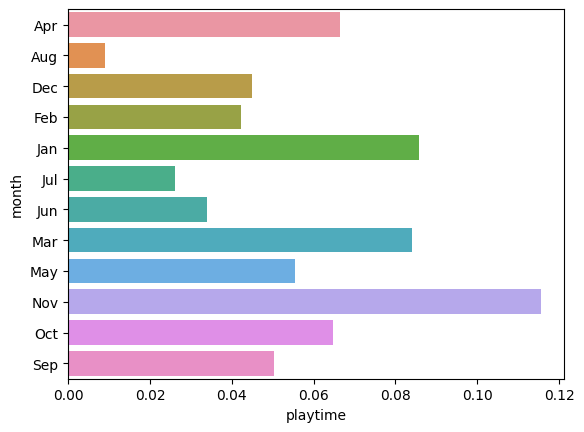

In [147]:
# Todo: plot podcast listening vs music listening
# damn i really spent most of january 2022 listening to podcats
podcasts_2020 = pod_df
podcasts_2020["playtime"] = podcasts_2020["playtime"] / 3600
podcast_per_month = podcasts_2020.groupby(by="month").sum(numeric_only=True)
podcast_per_month["playtime"]
sns.barplot(
    data=podcast_per_month, x=podcast_per_month["playtime"], y=podcast_per_month.index
)


In [143]:
pod_df


,timestamp,playtime,episode,show,spotify_episode_uri,start,end,ddate,dtime,date,time,month,year,day,hours
timestamp,,,,,,,,,,,,,,,
2022-01-18 16:50:55+00:00,2022-01-18 16:50:55+00:00,2.423611e-07,178 – Joy of Cooking (Pies),Sleepy,spotify:episode:6Y7GtYpMqhGMkjp84Tbb2o,trackdone,trackdone,2022-01-18,16:50:55,01/18/2022,16:50:55,Jan,2022,Tue,0.872500
2021-03-26 01:24:27+00:00,2021-03-26 01:24:27+00:00,2.191358e-08,Episode 191: Suezter's Millions,Trillbilly Worker's Party,spotify:episode:6m2sPQxCjAs1ssW4HF3RZD,clickrow,endplay,2021-03-26,01:24:27,03/26/2021,01:24:27,Mar,2021,Fri,0.078889
2022-08-31 18:31:16+00:00,2022-08-31 18:31:16+00:00,2.692130e-07,Part Three: Helena Blavatsky: the woman who in...,Behind the Bastards,spotify:episode:1mwh2W2ofPzGsFJRck4wx9,clickrow,trackdone,2022-08-31,18:31:16,08/31/2022,18:31:16,Aug,2022,Wed,0.969167
2022-01-08 09:54:11+00:00,2022-01-08 09:54:11+00:00,2.761574e-07,Episode 231: Unexpected Truths,Trillbilly Worker's Party,spotify:episode:2poTejLxoGJ4OrydSteNnU,clickrow,trackdone,2022-01-08,09:54:11,01/08/2022,09:54:11,Jan,2022,Sat,0.994167
2022-04-11 20:22:21+00:00,2022-04-11 20:22:21+00:00,1.674383e-08,10.21- The Socialist Revolutionaries,Revolutions,spotify:episode:0BuHDMn2lR5Li257rXRcAV,clickrow,trackdone,2022-04-11,20:22:21,04/11/2022,20:22:21,Apr,2022,Mon,0.060278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-02 22:12:18+00:00,2020-05-02 22:12:18+00:00,3.086420e-09,SUNDAY SERVICE 3: Great Political Leaders of t...,Trillbilly Worker's Party,spotify:episode:0sxM25cG9HLLCphvrbaFM3,trackdone,endplay,2020-05-02,22:12:18,05/02/2020,22:12:18,May,2020,Sat,0.011111
2022-01-10 05:23:40+00:00,2022-01-10 05:23:40+00:00,2.557870e-07,Charlie's Angels (2000),The Bechdel Cast,spotify:episode:5Es37WjDluqUKCCrdUfg25,clickrow,endplay,2022-01-10,05:23:40,01/10/2022,05:23:40,Jan,2022,Mon,0.920833
2021-03-02 03:06:40+00:00,2021-03-02 03:06:40+00:00,3.029321e-07,Groundhog Day with Jackie Kashian,The Bechdel Cast,spotify:episode:6q6BIbsO8AGbzPz4ijOZr9,trackdone,trackdone,2021-03-02,03:06:40,03/02/2021,03:06:40,Mar,2021,Tue,1.090556


In [137]:
pod.loc[:, "hours"] = pod_df.loc[:, "playtime"] / 3600
pod.drop(columns=["spotify_episode_uri", "start", "playtime"])
pod.index = pod.timestamp
pod

podm = pod.resample("M").sum().round()

podm.index = podm.index.month
podm


/tmp/ipykernel_28578/3193146897.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  podm = pod.resample('M').sum().round()


,playtime,hours
timestamp,,
7,42,0.0
8,16,0.0
9,0,0.0
10,0,0.0
11,33182,9.0
12,0,0.0
1,2700,1.0
2,0,0.0
3,195574,54.0


In [ ]:
# Todo: plot podcast listening vs music listening
# damn i really spent most of january 2022 listening to podcats
podcasts_2020 = pod_df
podcasts_2020["playtime"] = podcasts_2020["playtime"] / 3600
podcast_per_month = podcasts_2020.groupby(by="month").sum(numeric_only=True)
podcast_per_month["playtime"]
sns.barplot(
    data=podcast_per_month, x=podcast_per_month["playtime"], y=podcast_per_month.index
)


In [129]:
streams_af_df


,artist,track,album,duration,playtime,date,time,month,year,tempo,camelot,key_signature,start,end,shuffle,id,timestamp
0,Rich Boy,Throw Some D's Remix,Rich Boy,351,351,03/25/2021,18:43:26,Mar,2021,161,12A,D-flat minor,trackdone,trackdone,False,1qXLj4ywjsA0hGmaibmnn3,2021-03-25 18:43:26+00:00
1,Rich Boy,Throw Some D's Remix,Rich Boy,351,156,08/07/2021,05:06:29,Aug,2021,161,12A,D-flat minor,clickrow,endplay,False,1qXLj4ywjsA0hGmaibmnn3,2021-08-07 05:06:29+00:00
2,Rich Boy,Throw Some D's Remix,Rich Boy,351,351,01/21/2021,05:42:09,Jan,2021,161,12A,D-flat minor,trackdone,trackdone,False,1qXLj4ywjsA0hGmaibmnn3,2021-01-21 05:42:09+00:00
3,Rich Boy,Throw Some D's Remix,Rich Boy,351,0,10/18/2019,18:04:48,Oct,2019,161,12A,D-flat minor,clickrow,endplay,False,1qXLj4ywjsA0hGmaibmnn3,2019-10-18 18:04:48+00:00
4,Rich Boy,Throw Some D's Remix,Rich Boy,351,2,02/17/2022,11:15:58,Feb,2022,161,12A,D-flat minor,fwdbtn,fwdbtn,True,1qXLj4ywjsA0hGmaibmnn3,2022-02-17 11:15:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85407,James Blake,Frozen (feat. JID & SwaVay),Friends That Break Your Heart,236,236,09/30/2022,03:19:58,Sep,2022,100,6B,B-flat major,trackdone,trackdone,False,4IX1G5Ibs3aWyiSLUO7OPt,2022-09-30 03:19:58+00:00
85408,Teitanblood,Anteinfierno,Death,297,297,09/25/2021,04:34:37,Sep,2021,101,6A,G minor,clickrow,trackdone,False,2uFlPURngrcfsOz1nHgpaO,2021-09-25 04:34:37+00:00
85409,Xenia Rubinos,How Strange It Is,Black Terry Cat,192,192,12/06/2019,04:52:04,Dec,2019,112,11B,A major,trackdone,trackdone,False,0ta023auUvOMAhzQ4oIRF9,2019-12-06 04:52:04+00:00
85410,Master P,Meal Ticket,I'm Bout It,244,244,01/19/2021,01:55:48,Jan,2021,152,10B,D major,trackdone,trackdone,False,5TIGd8F70sI5mk6U4bubX8,2021-01-19 01:55:48+00:00
